In [12]:
import pandas as pd
import numpy as np

In [13]:
np.random.seed(0)
import matplotlib.pyplot as plt
df = pd.read_csv('winequality-red.csv') # Load the data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [15]:
# The target variable is 'quality'.
Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

In [16]:
X.shape

(1599, 11)

In [17]:
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [18]:
print(X_train.shape)
print(X_test.shape)


(1279, 11)
(320, 11)


In [19]:
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
np.__version__

'1.17.4'

In [23]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [24]:
features_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

print(list(zip(features_name, model.feature_importances_)))

[('fixed acidity', 0.02771784052639764), ('volatile acidity', 0.14608857216177729), ('citric acid', 0.009887296248192857), ('residual sugar', 0.03979134702059036), ('chlorides', 0.03834852557033405), ('free sulfur dioxide', 0.023490388326457175), ('total sulfur dioxide', 0.07114265123952238), ('density', 0.019403863263177522), ('pH', 0.04327445163274224), ('sulphates', 0.20548462450962468), ('alcohol', 0.3753704395011838)]


In [38]:
X_train.mean()

fixed acidity            8.337373
volatile acidity         0.530000
citric acid              0.272181
residual sugar           2.553167
chlorides                0.087024
free sulfur dioxide     16.032838
total sulfur dioxide    47.114152
density                  0.996757
pH                       3.309828
sulphates                0.659077
alcohol                 10.413995
dtype: float64

In [26]:
import shap
print(shap.__version__)

0.32.1


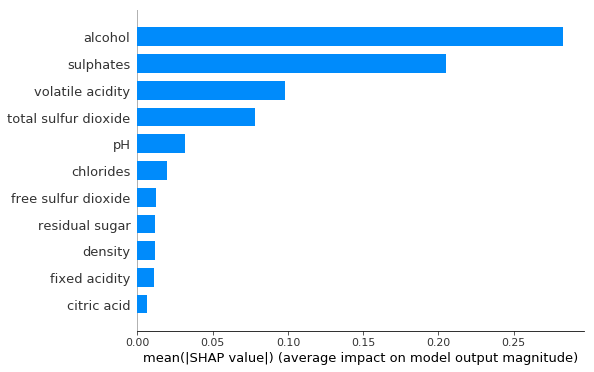

In [27]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [28]:
shap.initjs()

In [35]:
i=1278
print(X.iloc[i,:])
print("y = ", Y[i])

fixed acidity            8.00000
volatile acidity         0.71500
citric acid              0.22000
residual sugar           2.30000
chlorides                0.07500
free sulfur dioxide     13.00000
total sulfur dioxide    81.00000
density                  0.99688
pH                       3.24000
sulphates                0.54000
alcohol                  9.50000
Name: 1278, dtype: float64
y =  6


In [36]:
explainer = shap.TreeExplainer(model)
shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:])

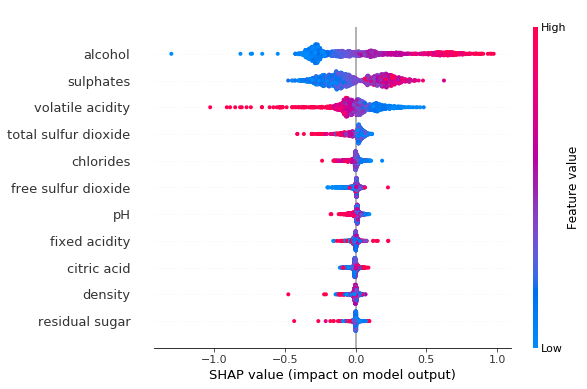

In [92]:
shap.summary_plot(shap_values, X_train)

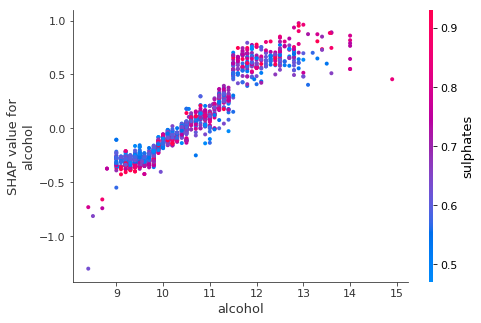

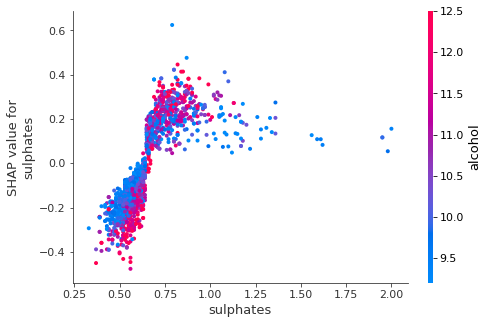

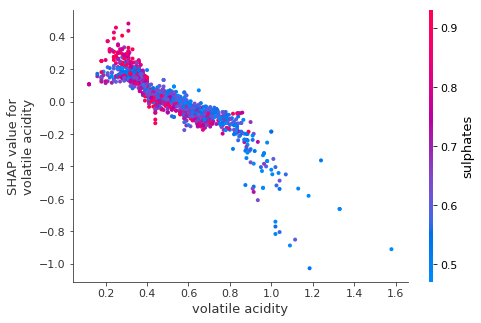

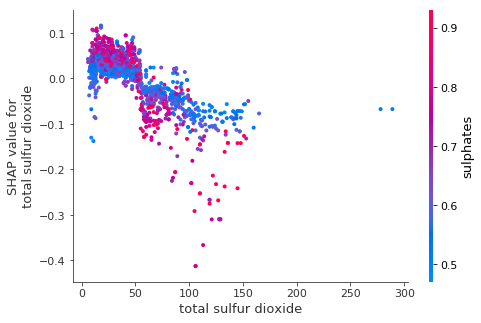

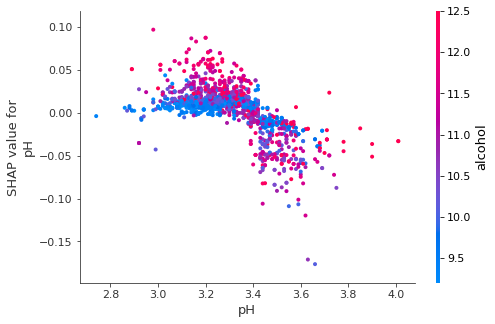

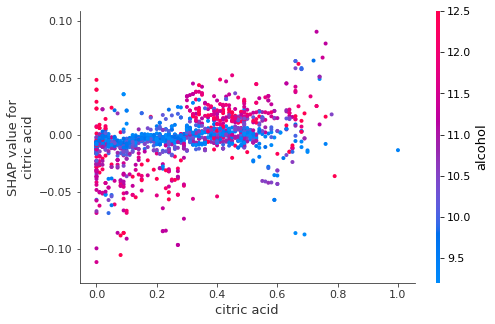

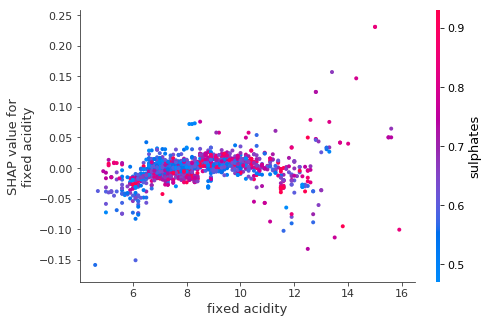

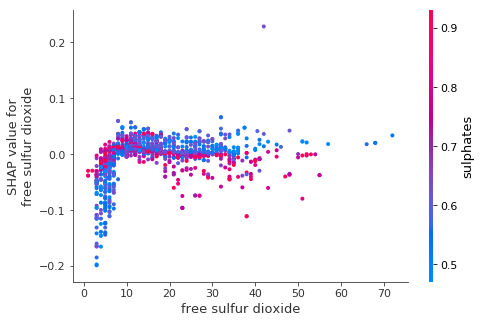

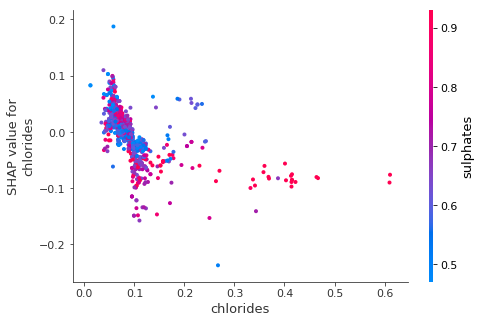

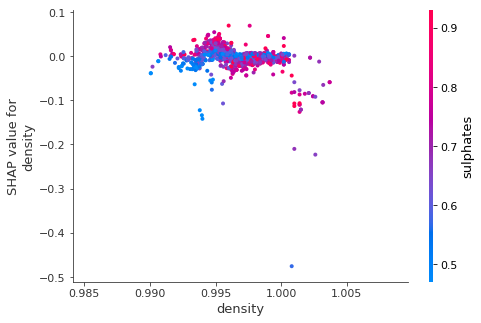

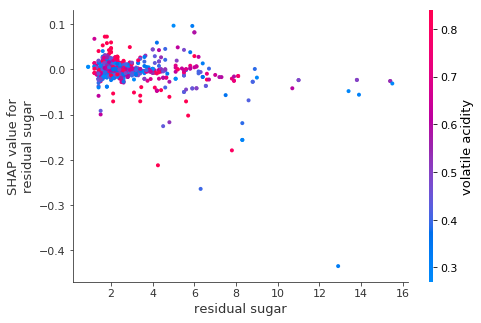

In [93]:
shap.dependence_plot("alcohol", shap_values, X_train)
shap.dependence_plot("sulphates", shap_values, X_train)
shap.dependence_plot("volatile acidity", shap_values, X_train)
shap.dependence_plot("total sulfur dioxide", shap_values, X_train)
shap.dependence_plot("pH", shap_values, X_train)
shap.dependence_plot("citric acid", shap_values, X_train)
shap.dependence_plot("fixed acidity", shap_values, X_train)
shap.dependence_plot("free sulfur dioxide", shap_values, X_train)
shap.dependence_plot("chlorides", shap_values, X_train)
shap.dependence_plot("density", shap_values, X_train)
shap.dependence_plot("residual sugar", shap_values, X_train)
